### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import sklearn

### Importing Data

In [2]:
data = np.loadtxt(r"E:\MachineLearning Coding Ninjas Course\Linear Regression\Datasets\0000000000002419_training_ccpp_x_y_train (1).csv",delimiter = ",")
data.shape

(7176, 5)

### Defining Data and Targer datasets

In [3]:
Data = data[:,0:4]
Target = data[:,4]

### Adding extra features 

In [4]:
columns = Data.shape[1]
for i in range(columns):
    new_column = (Data[:,i]*Data[:,i]).reshape(-1,1)
    Data = np.concatenate((Data,new_column),axis = 1)
Data.shape    

(7176, 8)

### Adding one column for constant values

In [5]:
onesArray = np.ones(Data.shape[0]).reshape(-1,1)
Data = np.concatenate((Data,onesArray),axis = 1)
Data.shape

(7176, 9)

### Converting into a DataFrame

In [6]:
dataFrame = pd.DataFrame(Data)
targetFrame = pd.DataFrame(Target)
print(dataFrame.isnull().sum())
print(dataFrame.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


### Printing dataFrame's value

In [7]:
dataFrame.head()

,0,1,2,3,4,5,6,7,8
0,8.58,38.38,1021.03,84.37,73.6164,1473.0244,1.042502e+06,7118.2969,1.0
1,21.79,58.20,1017.21,66.74,474.8041,3387.2400,1.034716e+06,4454.2276,1.0
2,16.64,48.92,1011.55,78.76,276.8896,2393.1664,1.023233e+06,6203.1376,1.0
3,31.38,71.32,1009.17,60.42,984.7044,5086.5424,1.018424e+06,3650.5764,1.0
4,9.20,40.03,1017.05,92.46,84.6400,1602.4009,1.034391e+06,8548.8516,1.0


### Scaling dataFrame using MIN-MAX scaling

In [8]:
def MIN_MAX_Scaling(df):
    newDataFrame = df.copy()
    for column in newDataFrame.columns:
        newDataFrame[column] = newDataFrame[column]/(newDataFrame[column].abs().max()-newDataFrame[column].abs().min())
    print(newDataFrame.shape) 
    return newDataFrame

### Max_Scaling function

In [9]:
def MAX_Scaling(df):
    newDataFrame = df.copy()
    for column in newDataFrame.columns:
        newDataFrame[column] = newDataFrame[column]/(newDataFrame[column].abs().max())
    print(newDataFrame.shape) 
    return newDataFrame

### Scaling using Max_Scale function

In [11]:
newDataFrame2 = MAX_Scaling(dataFrame)

(7176, 9)


In [13]:
newDataFrame2.head()

,0,1,2,3,4,5,6,7,8
0,0.239866,0.470574,0.988125,0.842352,0.057536,0.221440,0.976392,0.709557,1.0
1,0.609170,0.713585,0.984429,0.666334,0.371088,0.509204,0.969100,0.444001,1.0
2,0.465194,0.599804,0.978951,0.786342,0.216406,0.359765,0.958345,0.618334,1.0
3,0.877271,0.874448,0.976648,0.603235,0.769605,0.764660,0.953841,0.363892,1.0
4,0.257199,0.490804,0.984274,0.923123,0.066151,0.240889,0.968795,0.852156,1.0


### Spliting dataset into Test , Train dataset

In [14]:
from sklearn import model_selection

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = model_selection.train_test_split(newDataFrame2,Target,test_size=0.1,random_state=0)

### Importing LinearRegression model

In [28]:
from sklearn.linear_model import LinearRegression
algo1 = LinearRegression()

### Training over the dataset, fitting over the training data

In [30]:
algo1.fit(X_train1,Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Checking the score of the model

In [25]:
algo1.score(X_test1,Y_test1)

0.9324813344505171

## Data Cleaning, Feature scaling, Data Normalisation and Data visualization 

df.isnull()

df.describe()

### Printing the unique values

In [35]:
newDataFrame2.nunique()

0    2597
1     622
2    2353
3    4023
4    2597
5     622
6    2353
7    4023
8       1
dtype: int64

## Data Visualization graphs

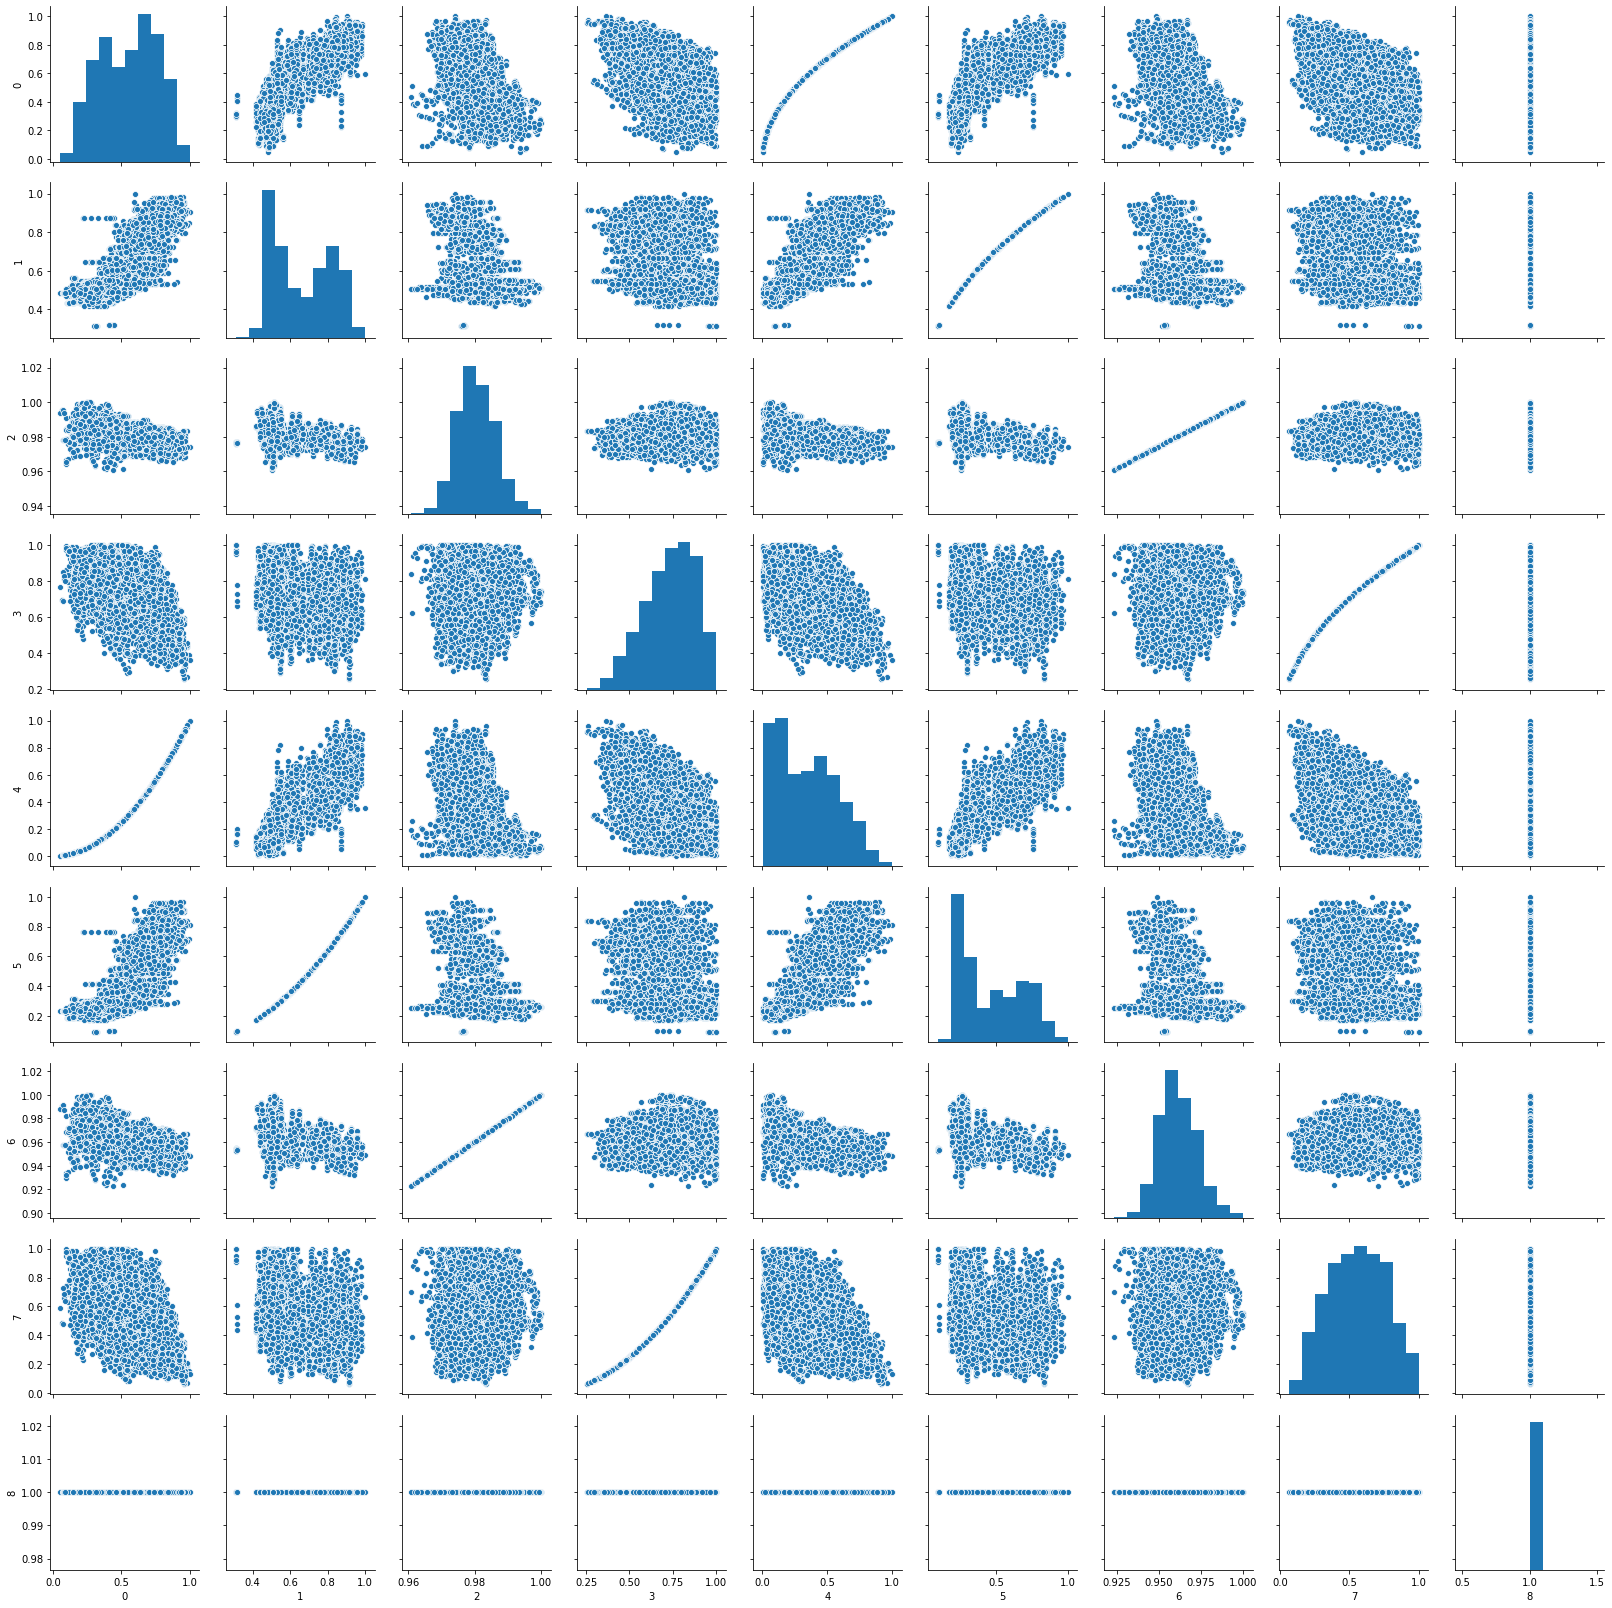

In [36]:
sns.pairplot(newDataFrame2)

In [37]:
corelation = newDataFrame2.corr()

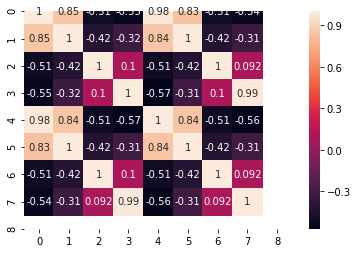

In [38]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the leaning process. However, it does not mean those variables are more important to predict the outcome of the model. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.
There are multiple normalization techniques in statistics. In this article, we will cover the most important ones:
1. The maximum absolute scaling
2. The min-max feature scaling
3. The z-score method
4. The robust scaling

### Min-Max absolute scaling
The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value.
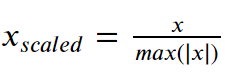
We can apply the maximum absolute scaling in Pandas using the .max() and .abs() methods, as shown below.

In [40]:
def maximum_absolute_scaling(df):
    # copy the dataframe
    df_min_max_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_min_max_scaled.columns:
        df_min_max_scaled[column] = df_min_max_scaled[column]  / df_min_max_scaled[column].abs().max()
    return df_min_max_scaled

In [41]:
df_Min_Max_Scale = maximum_absolute_scaling(newDataFrame2)
df_Min_Max_Scale.head

<bound method NDFrame.head of              0         1         2         3         4         5         6  \
0     0.239866  0.470574  0.988125  0.842352  0.057536  0.221440  0.976392   
1     0.609170  0.713585  0.984429  0.666334  0.371088  0.509204  0.969100   
2     0.465194  0.599804  0.978951  0.786342  0.216406  0.359765  0.958345   
3     0.877271  0.874448  0.976648  0.603235  0.769605  0.764660  0.953841   
4     0.257199  0.490804  0.984274  0.923123  0.066151  0.240889  0.968795   
...        ...       ...       ...       ...       ...       ...       ...   
7171  0.260554  0.462604  0.989200  0.793630  0.067888  0.214003  0.978516   
7172  0.313112  0.507357  0.988725  0.617911  0.098039  0.257411  0.977578   
7173  0.833100  0.850172  0.976832  0.646366  0.694056  0.722792  0.954200   
7174  0.457646  0.665768  0.985135  0.635284  0.209440  0.443246  0.970491   
7175  0.841767  0.760667  0.978119  0.478834  0.708571  0.578614  0.956716   

             7    8  
0     0.709

In [42]:
data1 = df_Min_Max_Scale.iloc[:,0:3]
target1 = df_Min_Max_Scale.iloc[:,3:4]
print(data1.head)
print(target1.head)

<bound method NDFrame.head of              0         1         2
0     0.239866  0.470574  0.988125
1     0.609170  0.713585  0.984429
2     0.465194  0.599804  0.978951
3     0.877271  0.874448  0.976648
4     0.257199  0.490804  0.984274
...        ...       ...       ...
7171  0.260554  0.462604  0.989200
7172  0.313112  0.507357  0.988725
7173  0.833100  0.850172  0.976832
7174  0.457646  0.665768  0.985135
7175  0.841767  0.760667  0.978119

[7176 rows x 3 columns]>
<bound method NDFrame.head of              3
0     0.842352
1     0.666334
2     0.786342
3     0.603235
4     0.923123
...        ...
7171  0.793630
7172  0.617911
7173  0.646366
7174  0.635284
7175  0.478834

[7176 rows x 1 columns]>


## Data without adding extra feautres

In [44]:
from sklearn.linear_model import LinearRegression
algo1 = LinearRegression()
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(data1,target1,test_size=0.1,random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6458, 3)
(718, 3)
(6458, 1)
(718, 1)


In [45]:
algo1.fit(X_train,Y_train)
predictions1 = algo1.predict(X_test)

In [ ]:
print(predictions1)
predictions1.shape

In [47]:
algo1.score(X_test,Y_test)

0.40586340052477854

# Using min-max feature scaling

In [103]:
from sklearn.linear_model import LinearRegression
algo2 = LinearRegression()

In [104]:
# apply the min-max scaling in Pandas using the .min() and .max() methods
def min_max_scaling(df):
    # copy the dataframe
    df_min_max_scaled = df.copy()
    # apply min-max scaling
    for column in df_min_max_scaled.columns:
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
        
    return df_min_max_scaled

In [105]:
df_min_max_scaled = min_max_scaling(df)
df_min_max_scaled.head()

,# T,V,AP,RH,EP,ones
0,0.199352,0.231673,0.696362,0.788338,0.821192,NaN
1,0.588339,0.584342,0.601831,0.552011,0.353377,NaN
2,0.436690,0.419217,0.461767,0.713137,0.427815,NaN
3,0.870730,0.817794,0.402871,0.467292,0.174570,NaN
4,0.217609,0.261032,0.597872,0.896783,0.796291,NaN


In [106]:
data2 = df_min_max_scaled.iloc[:,0:3]
target2 = df_min_max_scaled.iloc[:,3:4]
print(data2.shape)
print(target2.shape)

(7176, 3)
(7176, 1)


In [107]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(data2,target2,test_size = 0.1,random_state =0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6458, 3)
(718, 3)
(6458, 1)
(718, 1)


In [108]:
algo2.fit(X_train,Y_train)
predictions2 = algo2.predict(X_test)
algo2.score(X_test,Y_test)

0.40586340052477843

In [112]:
predictions2.shape

(718, 1)